# AI Python Zero-to-Hero
## Build a Customer Feedback Analyzer with DataLab

### **Introduction**

#### Dataset Overview:
- The `hotel_review.csv` dataset contains customer feedback from a hospitality business.
- Key columns include:
  - `How likely are you to recommend us to a friend or colleague?` for Net Promoter Score (NPS) calculations.
  - `Review` for textual feedback, useful for sentiment analysis and topic modeling.

#### Key Concepts:
1. **Net Promoter Score (NPS):** Measures customer loyalty. Scores:
   - 9–10: Promoters
   - 7–8: Passives
   - 0–6: Detractors
   - Formula: NPS = percentage of promoters - percentage of detractors

2. **Sentiment Analysis:** Identifies the emotional tone (positive, negative, or neutral) in reviews using pre-trained AI models.

3. **Topic Modeling:** Uses embeddings to identify recurring themes in text data.

---



### **Workbook Activities**

#### 1. Exploratory Data Analysis (EDA)


In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import plotly and pandas
import pandas as pd
import plotly.express as px

In [3]:
# Read in the dataset "hotel_review.csv" and show the first five rows
df = pd.read_csv('/kaggle/input/hotel-review/hotel_review.csv')
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [4]:
# What's the total length of the dataset?
length = len(df)
print(f"Total number of rows: {length}")

Total number of rows: 7001


In [5]:
# How would you identify missing values in this dataset?
missing_values = df.isnull().sum()
print("Missing values per column:")
missing_values

Missing values per column:


Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          7
dtype: int64

In [6]:
# How would you remove the missing values in this dataset?
df_cleaned = df.dropna()
df_cleaned

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...
...,...,...,...,...,...,...,...
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,10.0,"The room was good, comfortable and aesthetic \..."
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,9.0,good hotel
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,10.0,good experience for me about hotel \nvery good...
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,10.0,well done


In [7]:
# We're interested in the recommendation scores. What is their distribution? 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


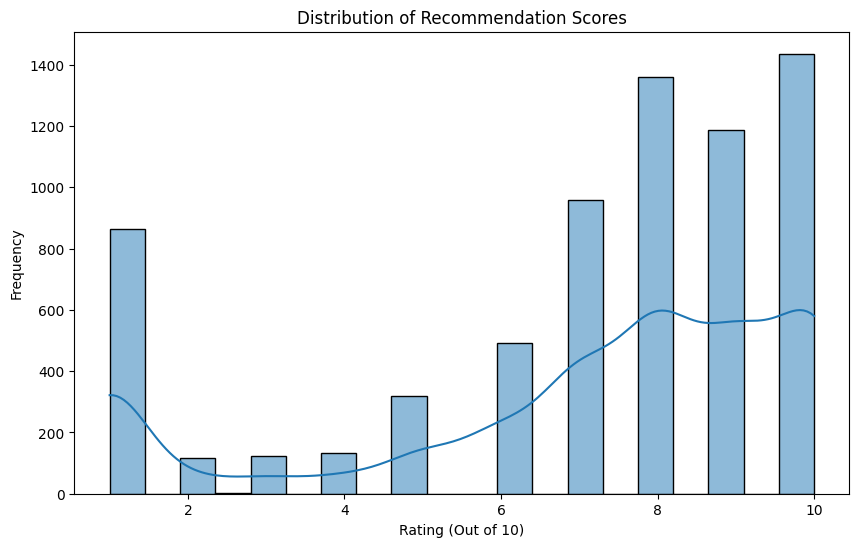

In [8]:
# Plot the distribution of the recommendation scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Rating(Out of 10)'], bins=20, kde=True)
plt.title('Distribution of Recommendation Scores')
plt.xlabel('Rating (Out of 10)')
plt.ylabel('Frequency')
plt.show()

#### 2. Calculate NPS

In [9]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)

In [10]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)
def classify_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df_cleaned['NPS_Category'] = df_cleaned['Rating(Out of 10)'].apply(classify_nps)
df_cleaned

<ipython-input-10-bcaca9141bc8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NPS_Category'] = df_cleaned['Rating(Out of 10)'].apply(classify_nps)


,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,NPS_Category
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...,Promoter
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...,Promoter
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",Promoter
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...,Promoter
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...,Promoter
...,...,...,...,...,...,...,...,...
6996,6996,FabHotel F9 NSP,"North Delhi, New Delhi",Aug-23,I'd like to thank Manager.,10.0,"The room was good, comfortable and aesthetic \...",Promoter
6997,6997,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,Superb,9.0,good hotel,Promoter
6998,6998,FabHotel F9 NSP,"North Delhi, New Delhi",Jul-23,fabulous,10.0,good experience for me about hotel \nvery good...,Promoter
6999,6999,FabHotel F9 NSP,"North Delhi, New Delhi",Jun-23,well done,10.0,well done,Promoter


In [11]:
# What proportion of customers are promoters, passives, and detractors?

In [12]:
# Calculate the proportion of customers in each NPS category
nps_proportions = df_cleaned['NPS_Category'].value_counts(normalize=True) * 100

# Display the proportions
nps_proportions

NPS_Category
Promoter     37.517872
Passive      33.142694
Detractor    29.339434
Name: proportion, dtype: float64

In [13]:
# Calculate the overall NPS and interpret its meaning

# Calculate the number of promoters, passives, and detractors
promoters = df_cleaned[df_cleaned['NPS_Category'] == 'Promoter'].shape[0]
passives = df_cleaned[df_cleaned['NPS_Category'] == 'Passive'].shape[0]
detractors = df_cleaned[df_cleaned['NPS_Category'] == 'Detractor'].shape[0]

# Calculate the total number of responses
total_responses = df_cleaned.shape[0]

# Calculate the NPS score
nps_score = ((promoters - detractors) / total_responses) * 100

# Interpret the NPS score
if nps_score > 0:
    nps_interpretation = "Positive"
elif nps_score < 0:
    nps_interpretation = "Negative"
else:
    nps_interpretation = "Neutral"

nps_score, nps_interpretation

(8.178438661710038, 'Positive')

In [14]:
# Interpret the NPS value in terms of customer loyalty
# Define the interpretation based on the NPS score
if nps_score > 50:
    loyalty_interpretation = "Excellent customer loyalty"
elif nps_score > 20:
    loyalty_interpretation = "Good customer loyalty"
elif nps_score > 0:
    loyalty_interpretation = "Moderate customer loyalty"
elif nps_score == 0:
    loyalty_interpretation = "Neutral customer loyalty"
else:
    loyalty_interpretation = "Poor customer loyalty"

nps_score, nps_interpretation, loyalty_interpretation

(8.178438661710038, 'Positive', 'Moderate customer loyalty')

#### 3. Sentiment Analysis 

In [15]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Analyze sentiments in the reviews using a pre-trained model

from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline('sentiment-analysis')

# Apply the sentiment analysis model to the review texts
df_cleaned['Sentiment'] = df_cleaned['Review_Text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Display the first few rows to verify the sentiment analysis results
df_cleaned[['Review_Text', 'Sentiment']].head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-17-74047911cb81>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sentiment'] = df_cleaned['Review_Text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])


,Review_Text,Sentiment
0,Hotel the pearl is perfect place to stay in De...,POSITIVE
1,Location of the hotel is perfect. The hotel is...,POSITIVE
2,"Location, Indian food.",POSITIVE
3,The location and the hotel itself is great. Ne...,POSITIVE
4,Friendly and smiling staffs.. The reception st...,POSITIVE


In [18]:
# Visualize sentiment distribution across the dataset

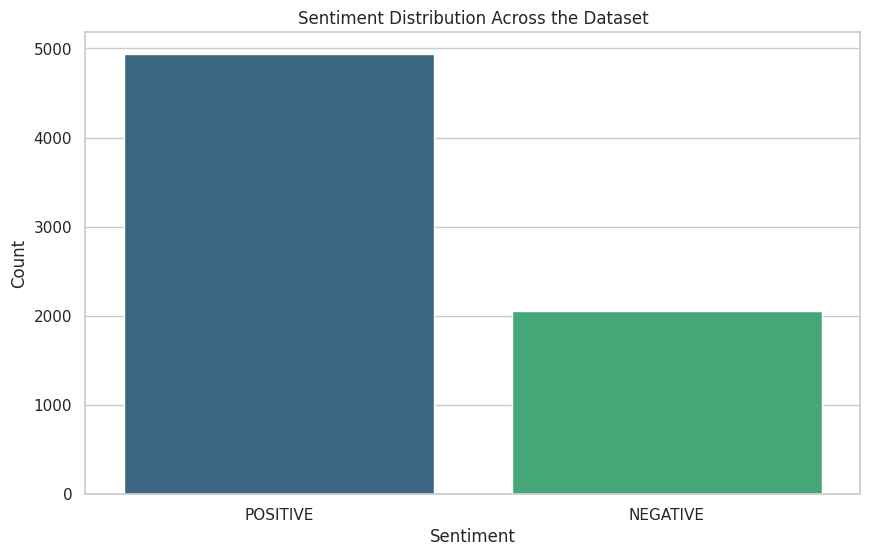

In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot to visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution Across the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [20]:
# How would you interpret the sentiment distribution?

In [21]:
# Interpretation of the sentiment distribution

# Calculate the percentage of each sentiment category
sentiment_counts = df_cleaned['Sentiment'].value_counts(normalize=True) * 100

# Display the sentiment distribution percentages
sentiment_counts

Sentiment
POSITIVE    70.56048
NEGATIVE    29.43952
Name: proportion, dtype: float64

#### 4. Topic Modeling

In [26]:
# What are some common keywords in the reviews?
# Import necessary libraries for text processing
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the review text data
X = vectorizer.fit_transform(df_cleaned['Review_Text'])

# Get the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Sum up the counts of each keyword
keyword_counts = X.toarray().sum(axis=0)

# Create a DataFrame to display the keywords and their counts
keywords_df = pd.DataFrame({'Keyword': keywords, 'Count': keyword_counts})

# Sort the DataFrame by count in descending order
keywords_df = keywords_df.sort_values(by='Count', ascending=False)

# Display the top keywords
keywords_df

,Keyword,Count
8,good,2563
18,staff,2270
11,hotel,1736
15,room,1659
12,location,1496
2,clean,1081
19,stay,974
13,nice,942
0,available,759
6,food,739


In [28]:
# Extract key topics from the reviews using embeddings
# Import necessary libraries for topic modeling using embeddings
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the review text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['Review_Text'])

# Initialize the Latent Dirichlet Allocation model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the tfidf matrix
lda_model.fit(tfidf_matrix)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

# Display the top words in each topic
no_top_words = 10
topics = display_topics(lda_model, feature_names, no_top_words)
topics_df = pd.DataFrame(topics)
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,staff,hotel,available,room,good
1,stay,nice,comments,like,location
2,hotel,near,review,ac,staff
3,behaviour,location,bad,breakfast,room
4,experience,station,money,clean,nice
5,ok,good,value,water,clean
6,good,airport,space,working,service
7,cleanliness,close,washroom,hotel,food
8,hospitality,metro,comfort,didn,great
9,room,delhi,class,did,friendly


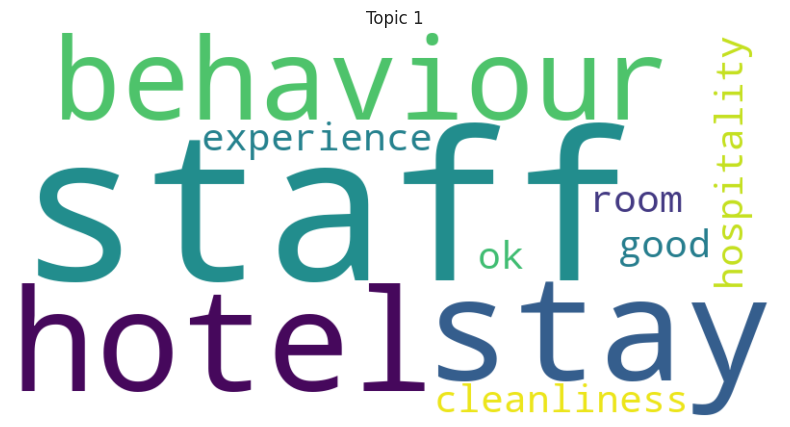

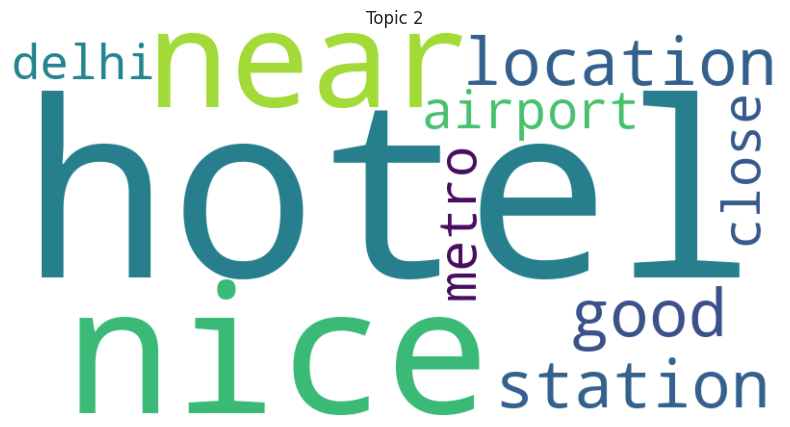

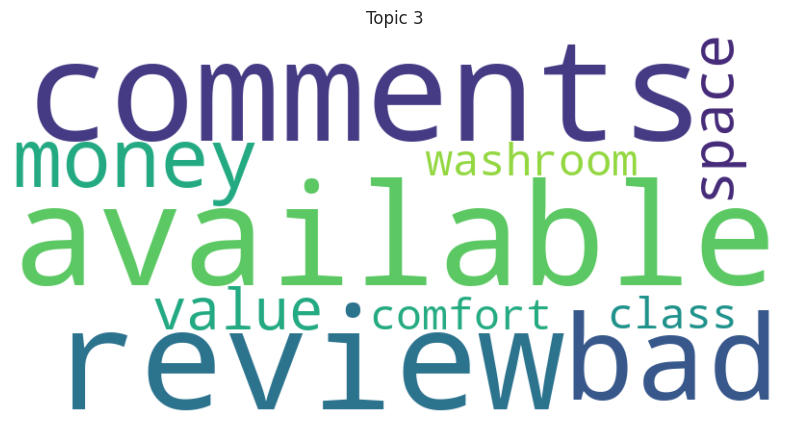

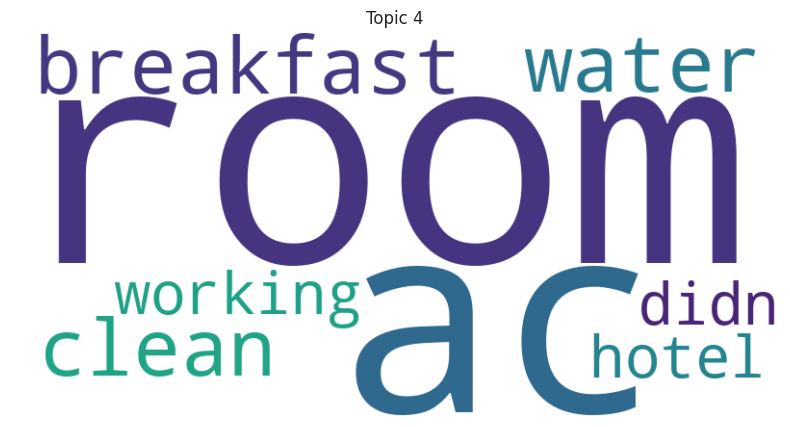

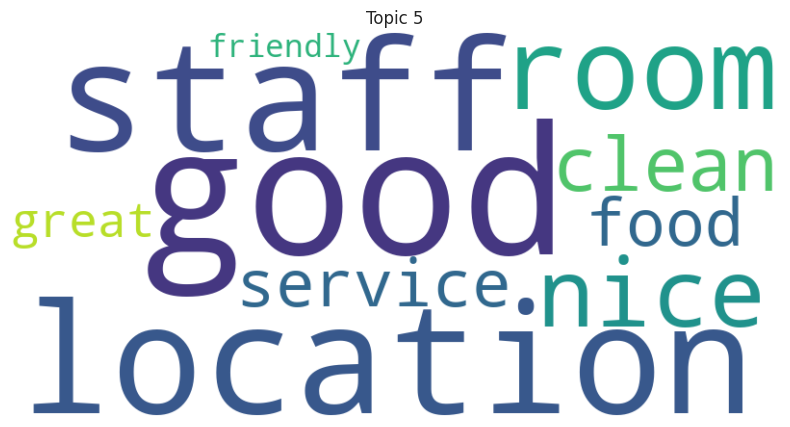

In [29]:
# Visualize results as a word cloud
# Import necessary libraries for word cloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds for each topic
def generate_word_clouds(topics):
    for topic, words in topics.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(topic)
        plt.show()

# Generate word clouds for the topics
generate_word_clouds(topics)